In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Basic Info

In [4]:
data.shape

(7043, 21)

In [5]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2773,2770-NSVDG,Male,0,Yes,No,24,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,29.10,688,No
4133,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
295,8203-XJZRC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,20.25,No
2311,8552-OBVRU,Female,1,Yes,Yes,48,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.50,5068.05,No
4182,4902-OHLSK,Female,1,No,No,29,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,98.65,2862.75,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Total charges is text not float so convert it

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
from ydata_profiling import ProfileReport
profile=ProfileReport(data)
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 250.42it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [29]:
data2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [8]:
TotalCharges=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [9]:
TotalCharges.isnull().value_counts()

TotalCharges
False    7032
True       11
Name: count, dtype: int64

### So Total Charges contain null values.

In [10]:
TotalCharges[TotalCharges.isna()==True]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [11]:
TotalCharges.loc[488]

nan

In [12]:
print(data.loc[TotalCharges.isna(), 'TotalCharges'])

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [86]:
data.loc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### TotalCharges has 11 missing values

## Handling missing values in total charges and converting to numeric column

In [9]:
data.iloc[488]["TotalCharges"]

' '

In [13]:
data[data['TotalCharges']==' '].shape #11 missing values so we can safely drop them as they are very less

(11, 21)

In [14]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(7032, 21)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [21]:
Churn=pd.get_dummies(data['Churn'],drop_first=True,dtype='int8')

In [22]:
data['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [25]:
Churn.head()

,Yes
0,0
1,0
2,1
3,0
4,1


In [27]:
Churn.columns=['Churn']

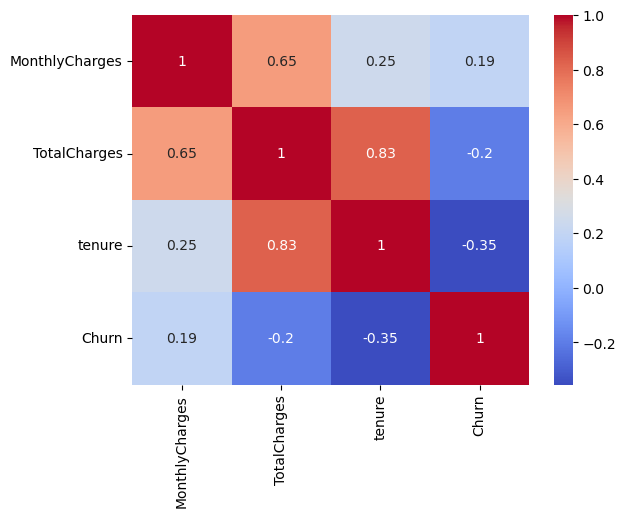

In [28]:
%matplotlib inline
sns.heatmap(pd.concat([data[['MonthlyCharges','TotalCharges','tenure']],Churn],axis=1).corr(),cmap='coolwarm',annot=True)
plt.show()

<Axes: ylabel='Frequency'>

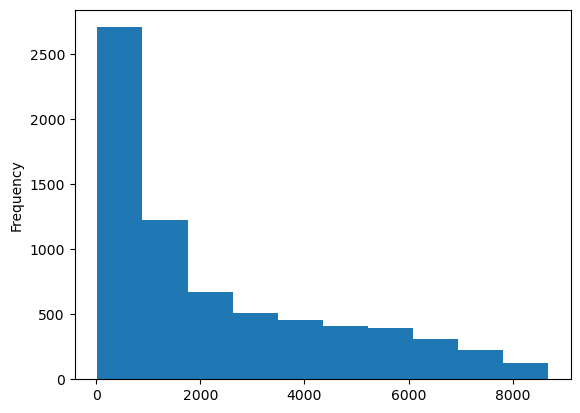

In [23]:
data['TotalCharges'].plot(kind='hist')

# Train Test Split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(['Churn'],axis=1),data['Churn'],test_size=0.2,random_state=40)

In [31]:
data['MonthlyCharges'].skew()

-0.22210292770166232

In [13]:
data['TotalCharges'].skew()

0.9616424997242504

<Axes: ylabel='Frequency'>

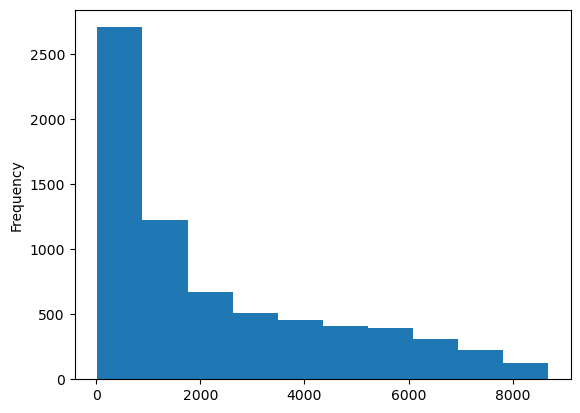

In [14]:
data['TotalCharges'].plot(kind='hist')

<Axes: ylabel='Frequency'>

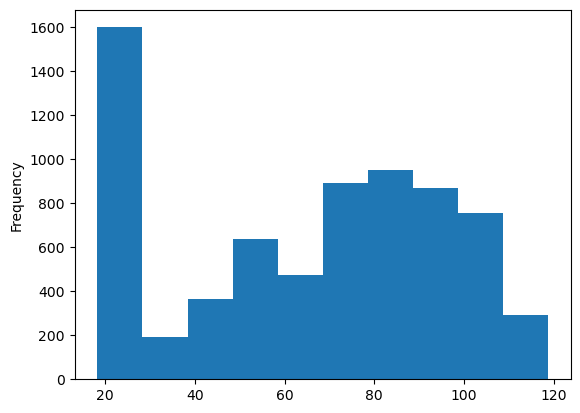

In [9]:
data['MonthlyCharges'].plot(kind='hist')

In [32]:
data_trf=ColumnTransformer([
    ('yeo_trf',PowerTransformer(),['MonthlyCharges','TotalCharges'])
],remainder='passthrough')
data_trf.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('yeo_trf', PowerTransformer(),
                                 ['MonthlyCharges', 'TotalCharges'])])

In [33]:
X_train_trf=data_trf.fit_transform(X_train)
X_test_trf=data_trf.transform(X_test)

In [23]:
X_train_trf['yeo_trf__MonthlyCharges'].skew()

-0.26171947388218714

### No improvement in Monthly charges so leave it just transform TotalCharges

In [75]:
data_trf2=ColumnTransformer([
    ('yeo_trf',PowerTransformer(),['TotalCharges'])
],remainder='passthrough')
data_trf2.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('yeo_trf', PowerTransformer(),
                                 ['TotalCharges'])])

In [76]:
X_train_trf=data_trf2.fit_transform(X_train)
X_test_trf=data_trf2.transform(X_test)

In [27]:
X_train_trf.columns

Index(['yeo_trf__TotalCharges', 'remainder__gender',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__InternetService',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__Contract', 'remainder__PaperlessBilling',
       'remainder__PaymentMethod', 'remainder__MonthlyCharges'],
      dtype='object')

<Axes: ylabel='Frequency'>

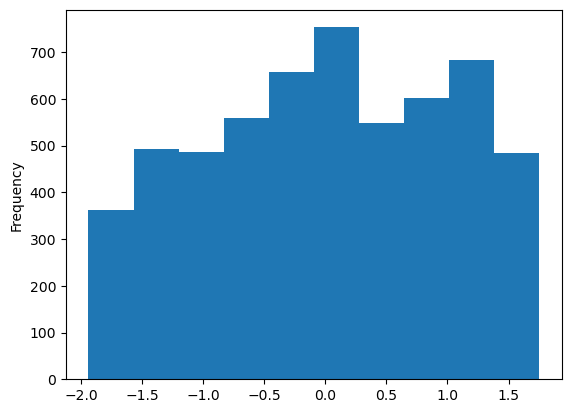

In [28]:
X_train_trf['yeo_trf__TotalCharges'].plot(kind='hist')

In [29]:
data['tenure'].skew()

0.23773083190513133

## Skew data doesn't matter for random forest but I transformed it so as to compare Logistic Regression

## Yeo transform and One Hot Encoding

In [36]:
data_trf_ohe=ColumnTransformer([
    ('yeo_trf',PowerTransformer(),['TotalCharges']),
    ('ohe',OneHotEncoder(drop='first',dtype='int8',sparse_output=False),['gender','Partner','Dependents'
    ,'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup'
    ,'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'
    ,'PaperlessBilling','PaymentMethod'])]
    ,remainder='passthrough')
data_trf_ohe.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('yeo_trf', PowerTransformer(),
                                 ['TotalCharges']),
                                ('ohe',
                                 OneHotEncoder(drop='first', dtype='int8',
                                               sparse_output=False),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [77]:
X_train_trf=data_trf_ohe.fit_transform(X_train)
X_test_trf=data_trf_ohe.transform(X_test)

In [36]:
X_train_trf.sample(5)

,yeo_trf__TotalCharges,ohe__gender_Male,ohe__Partner_Yes,ohe__Dependents_Yes,ohe__PhoneService_Yes,ohe__MultipleLines_No phone service,ohe__MultipleLines_Yes,ohe__InternetService_Fiber optic,ohe__InternetService_No,ohe__OnlineSecurity_No internet service,...,ohe__StreamingMovies_Yes,ohe__Contract_One year,ohe__Contract_Two year,ohe__PaperlessBilling_Yes,ohe__PaymentMethod_Credit card (automatic),ohe__PaymentMethod_Electronic check,ohe__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__MonthlyCharges
2382,-0.175516,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,29,39.50
2242,-0.221464,1,1,1,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,44,24.85
1226,0.218744,0,1,0,1,0,1,0,1,1,...,0,0,1,0,0,0,0,0,72,24.65
1956,1.543608,0,0,0,1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,72,101.30
4865,-0.864649,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,7,48.80


In [78]:
le=LabelEncoder()
y_train_trf=pd.DataFrame(le.fit_transform(y_train), index=X_train_trf.index, columns=['Churn'])
y_test_trf=pd.DataFrame(le.transform(y_test), index=X_test_trf.index, columns=['Churn'])

In [62]:
y_train_trf.sample(5)

,Churn
5345,1
1806,0
1167,0
3992,0
7018,1


In [79]:
X_tot=pd.concat([X_train_trf,X_test_trf],axis=0)
y_tot=pd.concat([y_train_trf,y_test_trf],axis=0)

In [58]:
X_tot.shape

(7032, 30)

In [64]:
y_tot.sample(5)

,Churn
6235,1
4212,1
4519,0
4080,0
5963,0


In [57]:
X_tot.sample(5)

,yeo_trf__TotalCharges,ohe__gender_Male,ohe__Partner_Yes,ohe__Dependents_Yes,ohe__PhoneService_Yes,ohe__MultipleLines_No phone service,ohe__MultipleLines_Yes,ohe__InternetService_Fiber optic,ohe__InternetService_No,ohe__OnlineSecurity_No internet service,...,ohe__StreamingMovies_Yes,ohe__Contract_One year,ohe__Contract_Two year,ohe__PaperlessBilling_Yes,ohe__PaymentMethod_Credit card (automatic),ohe__PaymentMethod_Electronic check,ohe__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__MonthlyCharges
6637,0.864319,1,1,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,69,53.65
207,-1.510603,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,79.90
5473,-0.273154,1,1,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,20,49.60
3469,0.011098,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,1,15,91.50
1411,0.625756,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,29,101.45


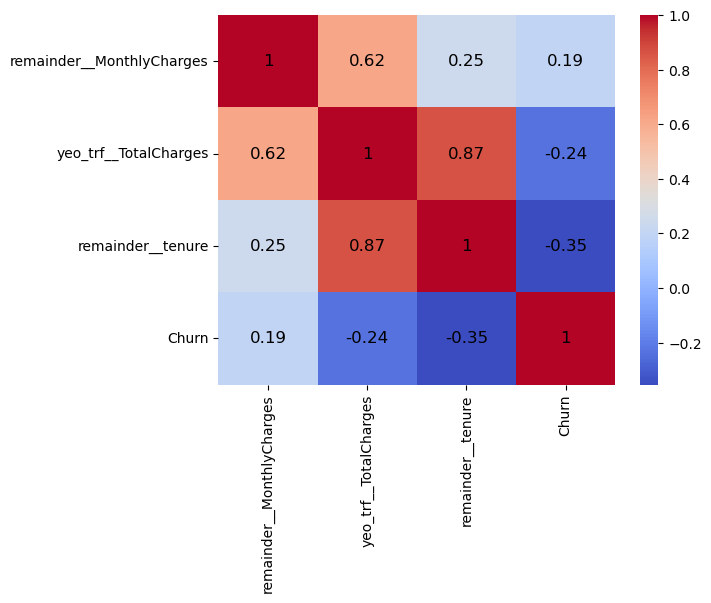

In [62]:
%matplotlib inline
sns.heatmap(pd.concat([X_tot[['remainder__MonthlyCharges','yeo_trf__TotalCharges','remainder__tenure']],y_tot],axis=1).corr(),cmap='coolwarm',annot=True,annot_kws={'color': 'black', 'fontsize': 12})
plt.show()

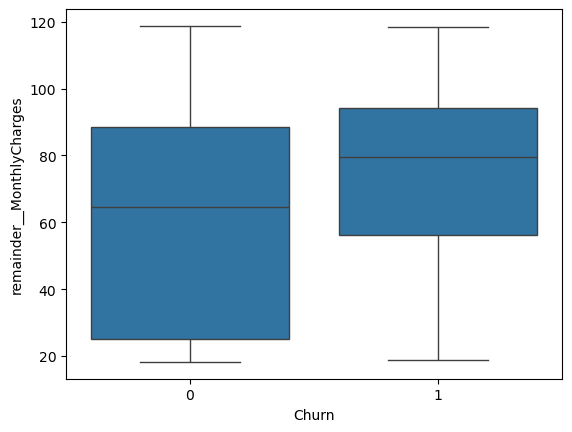

In [147]:
sns.boxplot(data=pd.concat([X_tot['remainder__MonthlyCharges'],y_tot],axis=1), x='Churn', y='remainder__MonthlyCharges')
plt.show()

### Customers paying higher monthly charges leaves

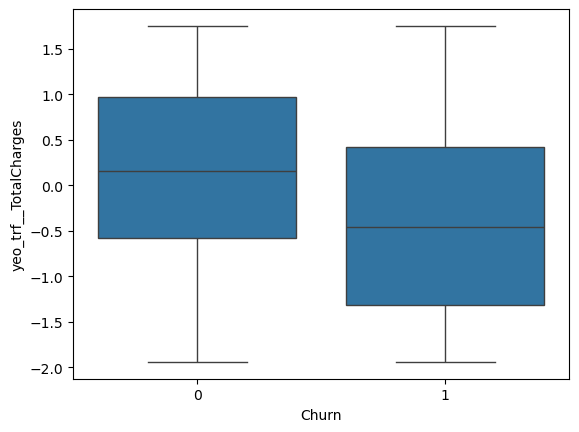

In [148]:
sns.boxplot(data=pd.concat([X_tot['yeo_trf__TotalCharges'],y_tot],axis=1), x='Churn', y='yeo_trf__TotalCharges')
plt.show()

### But customer with higher total charges stays

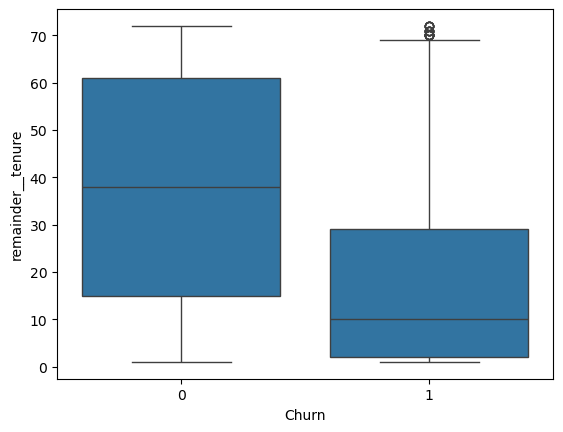

In [149]:
sns.boxplot(data=pd.concat([X_tot['remainder__tenure'],y_tot],axis=1), x='Churn', y='remainder__tenure')
plt.show()

### Customer with higher tenure also stays

### Impact of categorical columns on churn

In [80]:
rates=pd.concat([X_train_trf,y_train_trf],axis=1).groupby('ohe__gender_Male')['Churn'].mean()
effect_size=rates.max()-rates.min()
print(rates)
print('Max Percentage Diff:',effect_size*100,'%')

ohe__gender_Male
0    0.274090
1    0.263549
Name: Churn, dtype: float64
Max Percentage Diff: 1.0540520244762208 %


In [81]:
rates=pd.concat([X_train_trf,y_train_trf],axis=1).groupby('remainder__SeniorCitizen')['Churn'].mean()
effect_size=rates.max()-rates.min()
print(rates)
print('Max Percentage Diff:',effect_size*100,'%')

remainder__SeniorCitizen
0    0.240910
1    0.411063
Name: Churn, dtype: float64
Max Percentage Diff: 17.015284931434824 %


In [83]:
rates=pd.concat([X_train_trf,y_train_trf],axis=1).groupby('ohe__Partner_Yes')['Churn'].mean()
effect_size=rates.max()-rates.min()
print(rates)
print('Max Percentage Diff:',effect_size*100,'%')

ohe__Partner_Yes
0    0.330237
1    0.203091
Name: Churn, dtype: float64
Max Percentage Diff: 12.714685037486587 %


In [84]:
rates=pd.concat([X_train_trf,y_train_trf],axis=1).groupby('ohe__Dependents_Yes')['Churn'].mean()
effect_size=rates.max()-rates.min()
print(rates)
print('Max Percentage Diff:',effect_size*100,'%')

ohe__Dependents_Yes
0    0.315616
1    0.158303
Name: Churn, dtype: float64
Max Percentage Diff: 15.73128349158917 %


In [86]:
rates=pd.concat([X_train_trf,y_train_trf],axis=1).groupby('ohe__PhoneService_Yes')['Churn'].mean()
effect_size=rates.max()-rates.min()
print(rates)
print('Max Percentage Diff:',effect_size*100,'%')

ohe__PhoneService_Yes
0    0.250000
1    0.270813
Name: Churn, dtype: float64
Max Percentage Diff: 2.0812832119661504 %


In [87]:
rates=pd.concat([X_train_trf,y_train_trf],axis=1).groupby('ohe__MultipleLines_Yes')['Churn'].mean()
effect_size=rates.max()-rates.min()
print(rates)
print('Max Percentage Diff:',effect_size*100,'%')

ohe__MultipleLines_Yes
0    0.248838
1    0.295663
Name: Churn, dtype: float64
Max Percentage Diff: 4.682512257787389 %


In [93]:
rates=pd.concat([X_train_trf,y_train_trf],axis=1).groupby('ohe__InternetService_Fiber optic')['Churn'].mean()
effect_size=rates.max()-rates.min()
print(rates)
print('Max Percentage Diff:',effect_size*100,'%')

ohe__InternetService_Fiber optic
0    0.146146
1    0.422338
Name: Churn, dtype: float64
Max Percentage Diff: 27.61914040346444 %


<Figure size 4000x2000 with 0 Axes>

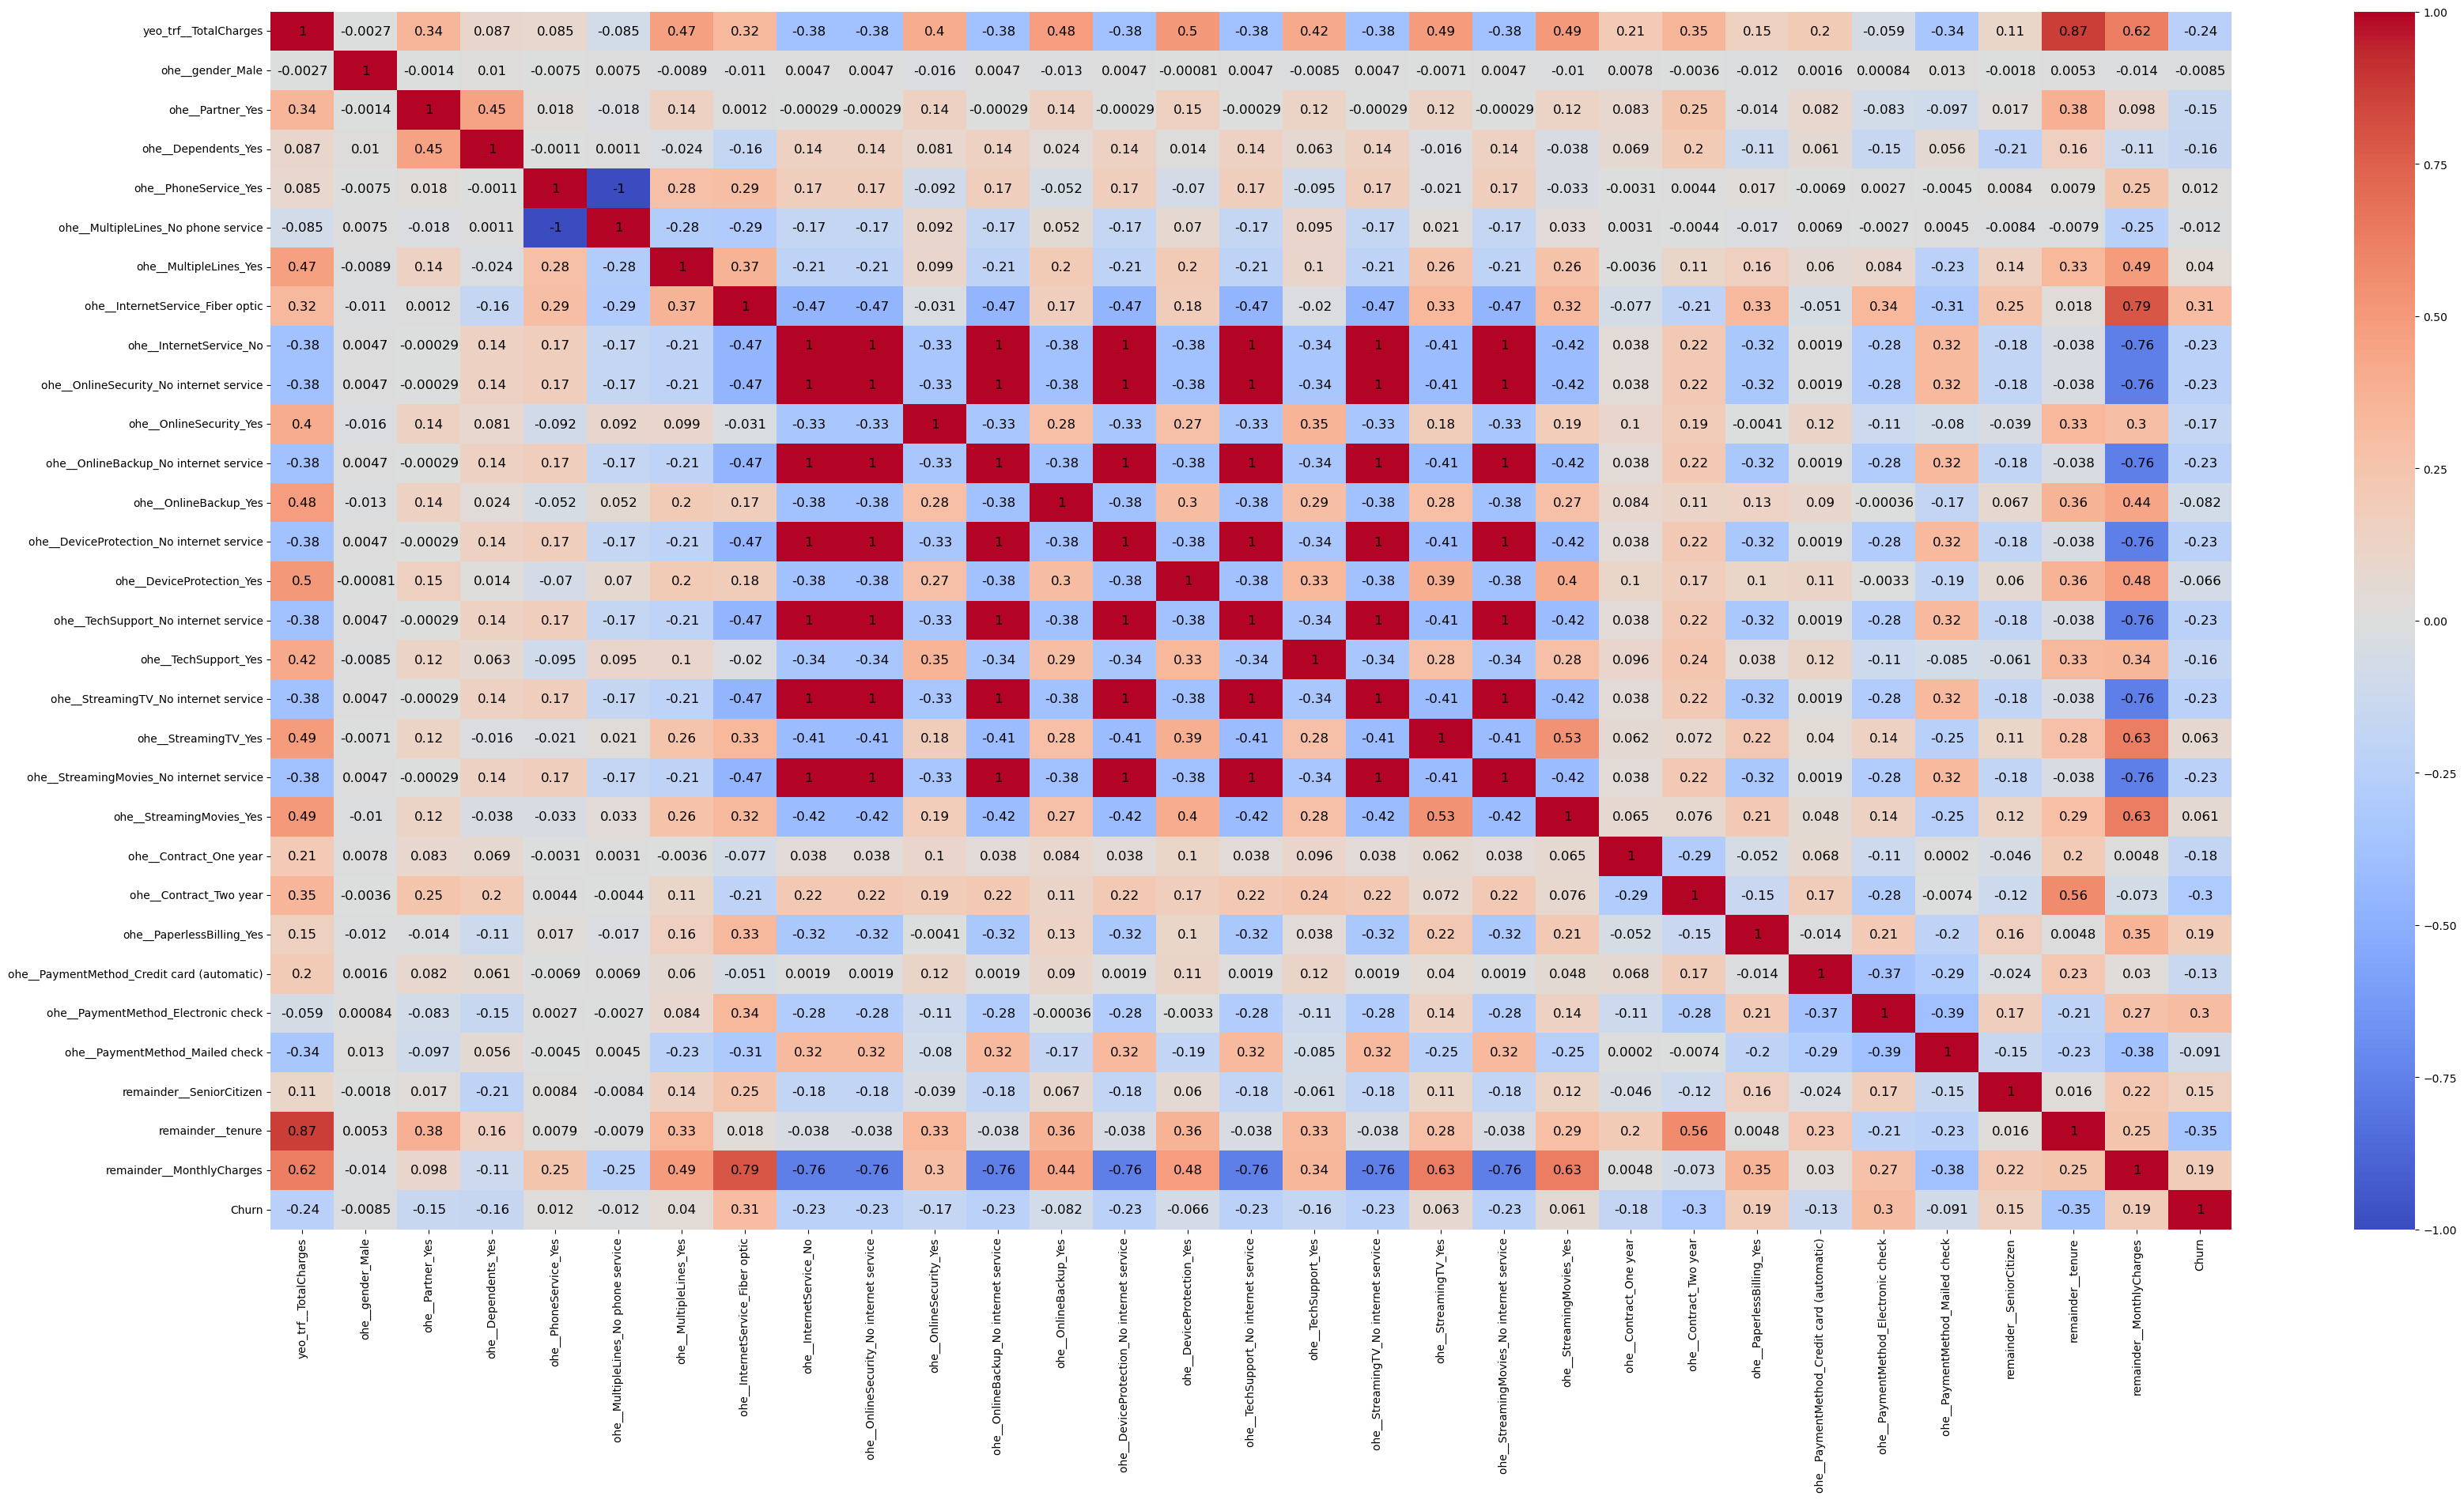

In [82]:
%matplotlib inline
plt.figure(figsize=(40,20))
sns.heatmap(pd.concat([X_tot,y_tot],axis=1).corr(numeric_only=True),cmap='coolwarm',annot=True,annot_kws={'color': 'black', 'fontsize': 12})
plt.show()

### Heatmap is good for intuition but final should be churn rates done above using groupby

## Final Preprocessing
### Columns like customerID and PhoneService is dropped. customerID is usique and hence not useful for prediction.
### Details about PhoneService is already covered in MultipleLines Feature

In [89]:
preprocess=ColumnTransformer([
    ('yeo_trf',PowerTransformer(),['TotalCharges']),
    ('drop_unwanted','drop',['PhoneService','customerID']),
    ('ohe',OneHotEncoder(drop='first',dtype='int8'),['gender','Partner','Dependents'
    ,'MultipleLines','InternetService','OnlineSecurity','OnlineBackup'
    ,'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'
    ,'PaperlessBilling','PaymentMethod'])
]
    ,remainder='passthrough')

In [90]:
churn_model_rf=Pipeline([
    ('preprocess',preprocess),
    ('model',RandomForestClassifier())
])

In [95]:
X_tot_raw = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y_tot_clean = pd.concat([y_train_trf, y_test_trf], axis=0).reset_index(drop=True)

In [91]:
X_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [92]:
churn_model_rf.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo_trf', PowerTransformer(),
                                                  ['TotalCharges']),
                                                 ('drop_unwanted', 'drop',
                                                  ['PhoneService',
                                                   'customerID']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int8'),
                                                  ['gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', RandomForestClassifier())])

In [93]:
y_pred=churn_model_rf.predict(X_test)

In [138]:
y_pred.shape

(1407,)

In [97]:
y_test_trf.shape

(1407, 1)

In [98]:
import warnings

In [99]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    print("accuracy:",np.mean(cross_val_score(churn_model_rf,X_tot_raw,y_tot_clean,scoring='accuracy',cv=10,error_score='raise')))
    print("precision:",np.mean(cross_val_score(churn_model_rf,X_tot_raw,y_tot_clean,scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(churn_model_rf,X_tot_raw,y_tot_clean,scoring='f1_macro',cv=10)))
    print("Train accuracy:", churn_model_rf.score(X_train, y_train_trf))
    print("Test accuracy:", churn_model_rf.score(X_test, y_test_trf))

accuracy: 0.7915237456355878
precision: 0.6406940076425127
f1 score: 0.7109325833560387
Train accuracy: 0.9976888888888888
Test accuracy: 0.7818052594171997


### Normally is is overfitting

### Manual hyperparameter tuning is done below

In [101]:
churn_model_rf2=Pipeline([
    ('preprocess',preprocess),
    ('model',RandomForestClassifier(n_estimators=100,max_depth=8,max_features=10,max_samples=0.75,min_samples_split=50,n_jobs=-1))
])
churn_model_rf2.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo_trf', PowerTransformer(),
                                                  ['TotalCharges']),
                                                 ('drop_unwanted', 'drop',
                                                  ['PhoneService',
                                                   'customerID']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int8'),
                                                  ['gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=10,
                                        max_samples=0.75, min_samples_split=50,
                                        n_jobs=-1))])

In [102]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    print("accuracy:",np.mean(cross_val_score(churn_model_rf2,X_tot_raw,y_tot_clean,scoring='accuracy',cv=10,error_score='raise')))
    print("precision:",np.mean(cross_val_score(churn_model_rf2,X_tot_raw,y_tot_clean,scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(churn_model_rf2,X_tot_raw,y_tot_clean,scoring='f1_macro',cv=10)))
    print("Train accuracy:", churn_model_rf2.score(X_train, y_train_trf))
    print("Test accuracy:", churn_model_rf2.score(X_test, y_test_trf))

accuracy: 0.8004817017974913
precision: 0.6659414679099905
f1 score: 0.7218468715018396
Train accuracy: 0.8266666666666667
Test accuracy: 0.7924662402274343


In [103]:
churn_model_rf3=Pipeline([
    ('preprocess',preprocess),
    ('model',RandomForestClassifier(n_estimators=100,max_depth=10,max_features=0.75,max_samples=0.5,min_samples_split=50,n_jobs=-1))
])
churn_model_rf3.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo_trf', PowerTransformer(),
                                                  ['TotalCharges']),
                                                 ('drop_unwanted', 'drop',
                                                  ['PhoneService',
                                                   'customerID']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int8'),
                                                  ['gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, max_features=0.75,
                                        max_samples=0.5, min_samples_split=50,
                                        n_jobs=-1))])

In [105]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    print("accuracy:",np.mean(cross_val_score(churn_model_rf3,X_tot_raw,y_tot_clean,scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(churn_model_rf3,X_tot_raw,y_tot_clean,scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(churn_model_rf3,X_tot_raw,y_tot_clean,scoring='f1_macro',cv=10)))
    print("Train accuracy:", churn_model_rf3.score(X_train, y_train_trf))
    print("Test accuracy:", churn_model_rf3.score(X_test, y_test_trf))

accuracy: 0.7996288229018493
precision: 0.6659979651865408
f1 score: 0.7212266658968718
Train accuracy: 0.8291555555555555
Test accuracy: 0.7960199004975125


### Hyperparameter tuning using GridSearchCV and RandomSearchCV(for fast execution)

In [106]:
params={
    'model__n_estimators':[100,200,300],
    'model__max_features':[0.4,0.5,0.6],
}
grid=GridSearchCV(
    estimator=churn_model_rf,
    param_grid=params,
    n_jobs=4,
    cv=10
)

In [107]:
grid.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('yeo_trf',
                                                                         PowerTransformer(),
                                                                         ['TotalCharges']),
                                                                        ('drop_unwanted',
                                                                         'drop',
                                                                         ['PhoneService',
                                                                          'customerID']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       dtype='int8'),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'model__max_features': [0.4, 0.5, 0.6],
                         'model__n_estimators': [100, 200, 300]})

In [108]:
grid.best_params_

{'model__max_features': 0.6, 'model__n_estimators': 200}

In [109]:
grid.best_score_

0.7966271183226614

In [112]:
params2={
    'model__n_estimators':[200,250],
    'model__max_features':[0.6,0.7,0.8],
    'model__max_samples':[0.6,0.7,0.8],
    'model__max_depth':[7,8,9,10],
    'model__min_samples_split':[20,50,80],
    'model__max_leaf_nodes':[30,50,70,90],
}
grid2=RandomizedSearchCV(
    estimator=churn_model_rf,
    param_distributions=params2,
    n_iter=100,
    n_jobs=4,
    cv=3
)

In [113]:
grid2.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('yeo_trf',
                                                                               PowerTransformer(),
                                                                               ['TotalCharges']),
                                                                              ('drop_unwanted',
                                                                               'drop',
                                                                               ['PhoneService',
                                                                                'customerID']),
                                                                              ('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             dtype='int8'),
                                                                               ['gender',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecur...
                                                                                'StreamingMovies',
                                                                                'Contract',
                                                                                'PaperlessBilling',
                                                                                'PaymentMethod'])])),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=4,
                   param_distributions={'model__max_depth': [7, 8, 9, 10],
                                        'model__max_features': [0.6, 0.7, 0.8],
                                        'model__max_leaf_nodes': [30, 50, 70,
                                                                  90],
                                        'model__max_samples': [0.6, 0.7, 0.8],
                                        'model__min_samples_split': [20, 50,
                                                                     80],
                                        'model__n_estimators': [200, 250]})

In [114]:
grid2.best_params_

{'model__n_estimators': 250,
 'model__min_samples_split': 20,
 'model__max_samples': 0.7,
 'model__max_leaf_nodes': 50,
 'model__max_features': 0.7,
 'model__max_depth': 10}

In [115]:
grid2.best_score_

0.8062222222222223

In [116]:
params3={
    'model__n_estimators':[250,275],
    'model__max_features':[0.7],
    'model__max_samples':[0.7],
    'model__max_depth':[10,11,12],
    'model__min_samples_split':[5,10,15],
    'model__max_leaf_nodes':[100,120],
}
grid3=RandomizedSearchCV(
    estimator=churn_model_rf,
    param_distributions=params3,
    n_iter=100,
    n_jobs=4,
    cv=3
)

In [117]:
grid3.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('yeo_trf',
                                                                               PowerTransformer(),
                                                                               ['TotalCharges']),
                                                                              ('drop_unwanted',
                                                                               'drop',
                                                                               ['PhoneService',
                                                                                'customerID']),
                                                                              ('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             dtype='int8'),
                                                                               ['gender',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecur...
                                                                                'StreamingTV',
                                                                                'StreamingMovies',
                                                                                'Contract',
                                                                                'PaperlessBilling',
                                                                                'PaymentMethod'])])),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=4,
                   param_distributions={'model__max_depth': [10, 11, 12],
                                        'model__max_features': [0.7],
                                        'model__max_leaf_nodes': [100, 120],
                                        'model__max_samples': [0.7],
                                        'model__min_samples_split': [5, 10, 15],
                                        'model__n_estimators': [250, 275]})

In [118]:
grid3.best_params_

{'model__n_estimators': 250,
 'model__min_samples_split': 5,
 'model__max_samples': 0.7,
 'model__max_leaf_nodes': 120,
 'model__max_features': 0.7,
 'model__max_depth': 10}

In [119]:
grid3.best_score_

0.8039111111111111

In [120]:
churn_model_rf3=Pipeline([
    ('preprocess',preprocess),
    ('model',RandomForestClassifier(n_estimators=250,max_depth=10,max_features=0.7,max_samples=0.7,min_samples_split=5,max_leaf_nodes=120,n_jobs=4))
])
churn_model_rf3.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo_trf', PowerTransformer(),
                                                  ['TotalCharges']),
                                                 ('drop_unwanted', 'drop',
                                                  ['PhoneService',
                                                   'customerID']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int8'),
                                                  ['gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, max_features=0.7,
                                        max_leaf_nodes=120, max_samples=0.7,
                                        min_samples_split=5, n_estimators=250,
                                        n_jobs=4))])

In [122]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    print("accuracy:",np.mean(cross_val_score(churn_model_rf3,X_tot_raw,y_tot_clean,scoring='accuracy',cv=5)))
    print("precision:",np.mean(cross_val_score(churn_model_rf3,X_tot_raw,y_tot_clean,scoring='precision',cv=5)))
    print("f1 score:",np.mean(cross_val_score(churn_model_rf3,X_tot_raw,y_tot_clean,scoring='f1_macro',cv=5)))
    print("Train accuracy:", churn_model_rf3.score(X_train, y_train_trf))
    print("Test accuracy:", churn_model_rf3.score(X_test, y_test_trf))

accuracy: 0.7999125486163978
precision: 0.6603580795839805
f1 score: 0.7247474255086291
Train accuracy: 0.8638222222222223
Test accuracy: 0.7825159914712153


In [124]:
churn_model_rf4=Pipeline([
    ('preprocess',preprocess),
    ('model',RandomForestClassifier(n_estimators=250,max_depth=9,max_features=0.2,max_samples=0.7,min_samples_split=5,max_leaf_nodes=100,n_jobs=4))
])
churn_model_rf4.fit(X_train,y_train_trf)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    print("accuracy:",np.mean(cross_val_score(churn_model_rf4,X_tot_raw,y_tot_clean,scoring='accuracy',cv=5)))
    print("precision:",np.mean(cross_val_score(churn_model_rf4,X_tot_raw,y_tot_clean,scoring='precision',cv=5)))
    print("f1 score:",np.mean(cross_val_score(churn_model_rf4,X_tot_raw,y_tot_clean,scoring='f1_macro',cv=5)))
    print("Train accuracy:", churn_model_rf4.score(X_train, y_train_trf))
    print("Test accuracy:", churn_model_rf4.score(X_test, y_test_trf))

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy: 0.8020454524775028
precision: 0.6694841966705927
f1 score: 0.7201021228829553
Train accuracy: 0.8369777777777778
Test accuracy: 0.7924662402274343


In [125]:
logReg=Pipeline([
    ('preprocess',preprocess),
    ('model',LogisticRegression(max_iter=100))
])
logReg.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo_trf', PowerTransformer(),
                                                  ['TotalCharges']),
                                                 ('drop_unwanted', 'drop',
                                                  ['PhoneService',
                                                   'customerID']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int8'),
                                                  ['gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression())])

In [127]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("accuracy:",np.mean(cross_val_score(logReg,X_tot_raw,y_tot_clean,scoring='accuracy',cv=5)))
    print("precision:",np.mean(cross_val_score(logReg,X_tot_raw,y_tot_clean,scoring='precision',cv=5)))
    print("f1 score:",np.mean(cross_val_score(logReg,X_tot_raw,y_tot_clean,scoring='f1_macro',cv=5)))
    print("Train accuracy:", logReg.score(X_train, y_train_trf))
    print("Test accuracy:", logReg.score(X_test, y_test_trf))

accuracy: 0.8071673738602254
precision: 0.6771766093674016
f1 score: 0.7326436091099876
Train accuracy: 0.8113777777777778
Test accuracy: 0.8017057569296375


In [128]:
params_lr={
    'model__max_iter':[100,150,200],
}
gridLR=GridSearchCV(
    estimator=logReg,
    param_grid=params_lr,
    cv=5,
    n_jobs=4
)
gridLR.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('yeo_trf',
                                                                         PowerTransformer(),
                                                                         ['TotalCharges']),
                                                                        ('drop_unwanted',
                                                                         'drop',
                                                                         ['PhoneService',
                                                                          'customerID']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       dtype='int8'),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('model', LogisticRegression())]),
             n_jobs=4, param_grid={'model__max_iter': [100, 150, 200]})

In [129]:
gridLR.best_params_

{'model__max_iter': 150}

In [130]:
gridLR.best_score_

0.8083555555555556

In [132]:
logReg2=Pipeline([
    ('preprocess',preprocess),
    ('model',LogisticRegression(max_iter=150))
])
logReg2.fit(X_train,y_train_trf)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("accuracy:",np.mean(cross_val_score(logReg2,X_tot_raw,y_tot_clean,scoring='accuracy',cv=5)))
    print("precision:",np.mean(cross_val_score(logReg2,X_tot_raw,y_tot_clean,scoring='precision',cv=5)))
    print("f1 score:",np.mean(cross_val_score(logReg2,X_tot_raw,y_tot_clean,scoring='f1_macro',cv=5)))
    print("Train accuracy:", logReg2.score(X_train, y_train_trf))
    print("Test accuracy:", logReg2.score(X_test, y_test_trf))

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.8061719445851419
precision: 0.676125963948551
f1 score: 0.7307778492719598
Train accuracy: 0.8108444444444445
Test accuracy: 0.798862828713575


## Logistic Regression is almost as good as Random Forest which means data is almost linear.

# Final Models

In [133]:
preprocess=ColumnTransformer([
    ('yeo_trf',PowerTransformer(),['TotalCharges']),
    ('drop_unwanted','drop',['PhoneService','customerID']),
    ('ohe',OneHotEncoder(drop='first',dtype='int8'),['gender','Partner','Dependents'
    ,'MultipleLines','InternetService','OnlineSecurity','OnlineBackup'
    ,'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'
    ,'PaperlessBilling','PaymentMethod'])
]
    ,remainder='passthrough')

In [134]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(['Churn'],axis=1),data['Churn'],test_size=0.2,random_state=40)

In [135]:
y_train_trf=le.fit_transform(y_train)
y_test_trf=le.transform(y_test)

In [136]:
churn_rf_pipe=Pipeline([
    ('preprocess',preprocess),
    ('model',RandomForestClassifier(n_estimators=250,max_depth=9,max_features=0.2,max_samples=0.7,min_samples_split=5,max_leaf_nodes=100,n_jobs=4))
])
churn_rf_pipe.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo_trf', PowerTransformer(),
                                                  ['TotalCharges']),
                                                 ('drop_unwanted', 'drop',
                                                  ['PhoneService',
                                                   'customerID']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int8'),
                                                  ['gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 RandomForestClassifier(max_depth=9, max_features=0.2,
                                        max_leaf_nodes=100, max_samples=0.7,
                                        min_samples_split=5, n_estimators=250,
                                        n_jobs=4))])

In [138]:
churn_lr_pipe=Pipeline([
    ('preprocess',preprocess),
    ('model',LogisticRegression(max_iter=150,n_jobs=4))
])
churn_lr_pipe.fit(X_train,y_train_trf)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo_trf', PowerTransformer(),
                                                  ['TotalCharges']),
                                                 ('drop_unwanted', 'drop',
                                                  ['PhoneService',
                                                   'customerID']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int8'),
                                                  ['gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression(max_iter=150, n_jobs=4))])

In [139]:
import pickle

In [140]:
pickle.dump(churn_rf_pipe,open('churn_predict_rf.pkl','wb'))
pickle.dump(churn_lr_pipe,open('churn_predict_lr.pkl','wb'))

In [141]:
rf_pipe=pickle.load(open('churn_predict_rf.pkl','rb'))
lr_pipe=pickle.load(open('churn_predict_lr.pkl','rb'))

In [142]:
person1_df=data.drop(columns=['Churn']).iloc[[5]]
data.iloc[5,-1]

'Yes'

In [143]:
rf_pipe.predict(person1_df)

array([1])

In [146]:
pickle.dump(preprocess,open('preprocess_telco.pkl','wb'))